# Test task for Scorista employment
# By Vitaly Petrov (https://github.com/VitalyPetrov)

## Data uploading and first look

In the following notebook I will present the results of my processing of given clients features data in order to predict certain targets ('Status' dataset column)

At first, let us import all the necessary modules and set default plotting parameters

/home/vit/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Vedrana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


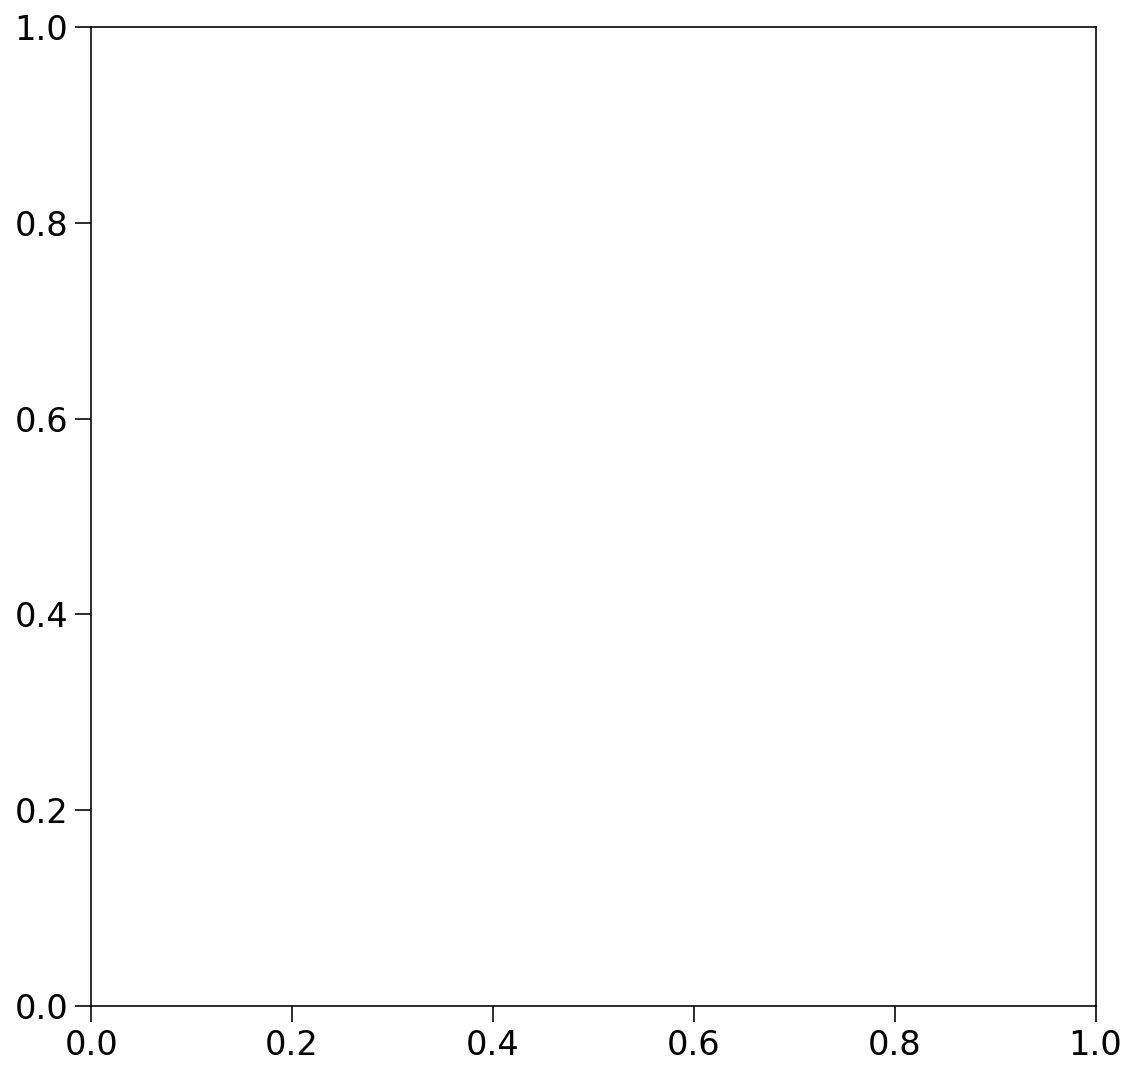

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from IPython.display import set_matplotlib_formats

plt.style.use("seaborn-deep")
set_matplotlib_formats('retina')

plt.rcParams['figure.figsize'] = (9, 9)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.edgecolor'] = 'black'

plt.tick_params(size = 8 ,labelsize = 'large')


font = {'weight' : 'regular',
        'size'   : 14}

rc('font', **font)

Upload the data from .xlsx file

In [72]:
data = pd.read_excel('data.xlsx')

data

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_68,Factor_69,Factor_70,Factor_71,Factor_72,Factor_73,Factor_74,Factor_75,STATUS,Балл
0,0.333333,0.014545,0.666667,153923,0,0.000000,0.000000,153923,153923,0,...,0.500000,1059,0.003636,0,0,0,0,0,1,NaN
1,0.727273,0.309942,0.954545,338179,2,0.866667,14296.266670,285955,22963,3,...,0.022727,41,0.005848,0,0,1,2,0,0,NaN
2,0.000000,0.000000,0.000000,0,1,0.000000,0.000000,0,0,1,...,0.000000,6,0.000000,0,0,0,0,0,0,NaN
3,1.000000,1.000000,1.000000,38969,3,2.666667,12989.666670,50977,30325,3,...,0.000000,40,0.000000,0,0,0,0,0,0,NaN
4,1.000000,0.206897,0.666667,3000,1,1.000000,1500.000000,8000,3000,1,...,0.333333,6,0.137931,0,0,0,0,0,1,NaN
5,0.000000,0.653846,1.000000,0,3,4.000000,10117.000000,0,0,3,...,0.333333,59,0.000000,1,2,2,0,1,0,NaN
6,0.608696,0.441520,0.782609,580700,1,0.000000,0.000000,651014,352291,1,...,0.304348,557,0.002924,0,0,0,0,0,1,NaN
7,0.571429,0.531915,0.571429,2452,0,0.000000,0.000000,25000,2452,0,...,0.142857,9,0.063830,0,0,0,0,0,0,NaN
8,0.181818,0.061497,0.818182,0,0,0.000000,0.000000,0,0,0,...,0.818182,473,0.013369,0,0,0,0,0,1,NaN
9,0.777778,0.543568,0.833333,998292,0,0.000000,0.000000,696176,245497,0,...,0.333333,40,0.006224,0,0,0,0,0,0,NaN


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 77 columns):
Factor_1     6394 non-null float64
Factor_2     6394 non-null float64
Factor_3     6394 non-null float64
Factor_4     6394 non-null int64
Factor_5     6394 non-null int64
Factor_6     6394 non-null float64
Factor_7     6394 non-null float64
Factor_8     6394 non-null int64
Factor_9     6394 non-null int64
Factor_10    6394 non-null int64
Factor_11    6394 non-null float64
Factor_12    6394 non-null int64
Factor_13    6394 non-null int64
Factor_14    6394 non-null int64
Factor_15    6394 non-null int64
Factor_16    6394 non-null int64
Factor_17    6394 non-null float64
Factor_18    6394 non-null float64
Factor_19    6394 non-null int64
Factor_20    6394 non-null float64
Factor_21    6394 non-null float64
Factor_22    6394 non-null float64
Factor_23    6394 non-null float64
Factor_24    6394 non-null float64
Factor_25    6394 non-null int64
Factor_26    6394 non-null float64
Factor_

In [74]:
data.describe()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_68,Factor_69,Factor_70,Factor_71,Factor_72,Factor_73,Factor_74,Factor_75,STATUS,Балл
count,6394.000000,6394.000000,6394.000000,6.394000e+03,6394.000000,6394.000000,6.394000e+03,6.394000e+03,6.394000e+03,6394.000000,...,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,0.0
mean,0.630109,0.453784,0.774382,2.735900e+05,2.731467,1.189705,8.975241e+03,2.407472e+05,1.211434e+05,3.221927,...,0.348230,410.21442,0.067832,0.553331,1.148420,0.728495,0.271505,0.553331,0.322646,NaN
std,0.292184,0.278495,0.257964,9.505452e+05,4.527406,1.620388,3.680669e+04,6.999517e+05,6.823942e+05,5.521740,...,0.545786,768.08398,0.151400,1.591975,3.419521,1.808814,1.007299,1.591975,0.467525,NaN
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.500000,0.214286,0.666667,3.070250e+03,0.000000,0.000000,0.000000e+00,5.000000e+03,2.600250e+03,0.000000,...,0.000000,13.00000,0.002064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.666667,0.454716,0.848485,4.177050e+04,1.000000,0.777778,3.304286e+03,4.700000e+04,2.037900e+04,1.000000,...,0.142857,42.00000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.857143,0.690931,1.000000,2.163698e+05,3.000000,1.555556,1.002923e+04,2.119912e+05,8.204350e+04,4.000000,...,0.500000,372.00000,0.055046,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
max,1.000000,1.000000,1.000000,4.297562e+07,52.000000,12.000000,1.790789e+06,3.053000e+07,4.241549e+07,72.000000,...,11.000000,4571.00000,1.000000,29.000000,93.000000,24.000000,15.000000,29.000000,1.000000,NaN


We see from the table that features differ strongly from each other (see, for example, 'mean' or 'std' row). It may cause a serious error while model training so I will take it into account while data preprocessing

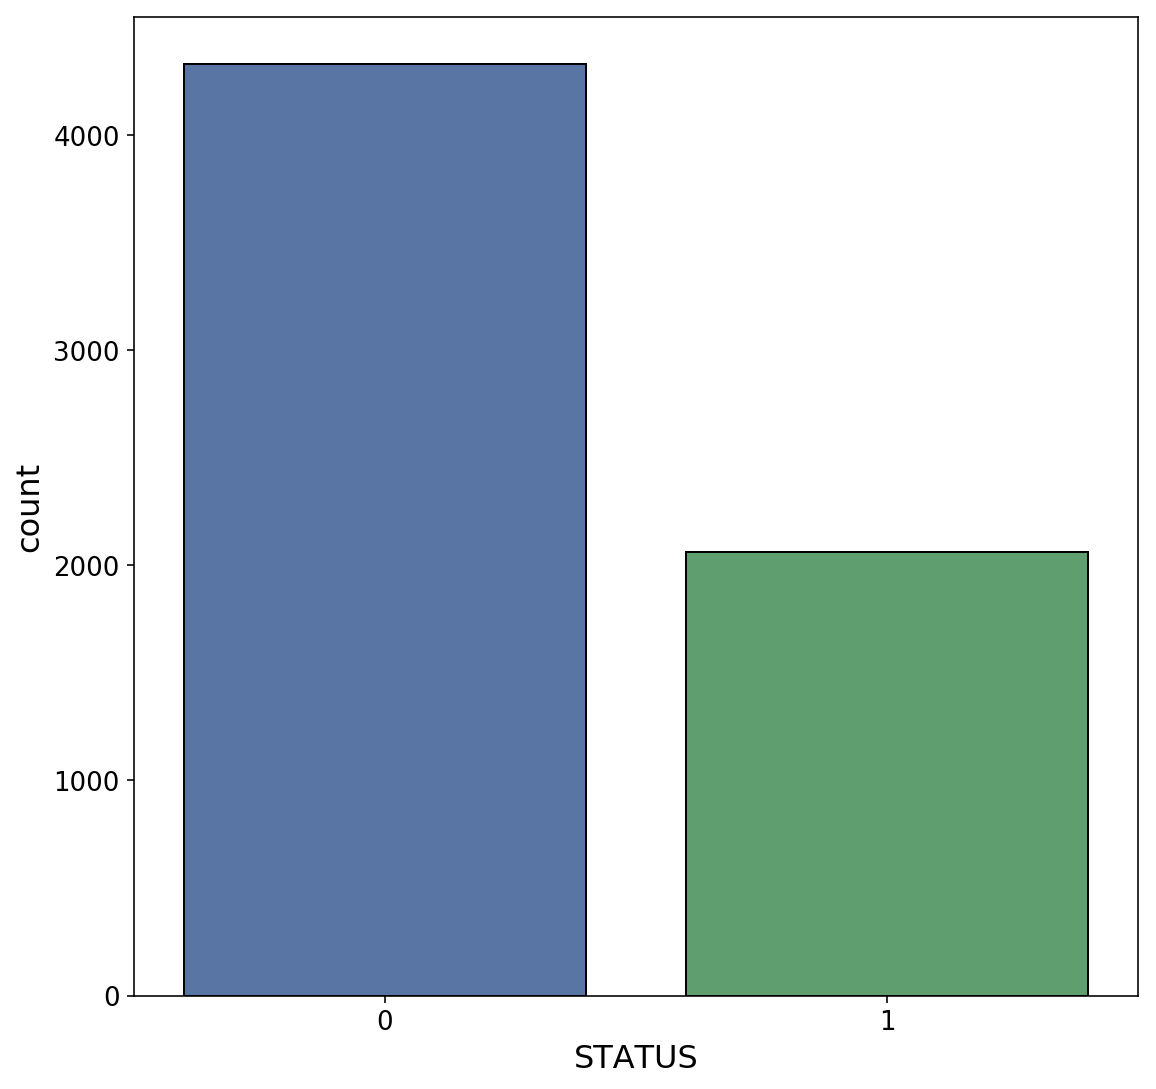

In [75]:
sns.countplot(data['STATUS'])

The distribution of classes is not equal -- the count is "0" samples is ~2 times higher than the "1" ones. It also may cause problems in the nearest future so we need to make a certain correction. I will do it by performing standart oversampling procedure. Not the brute force version(just simply dublicate "1" samples and add it to dataser) but more intelligent one (simply increase the corresponding weights on loss function)

Finally, let us split the features and target column and check the pair-wise correlations of features

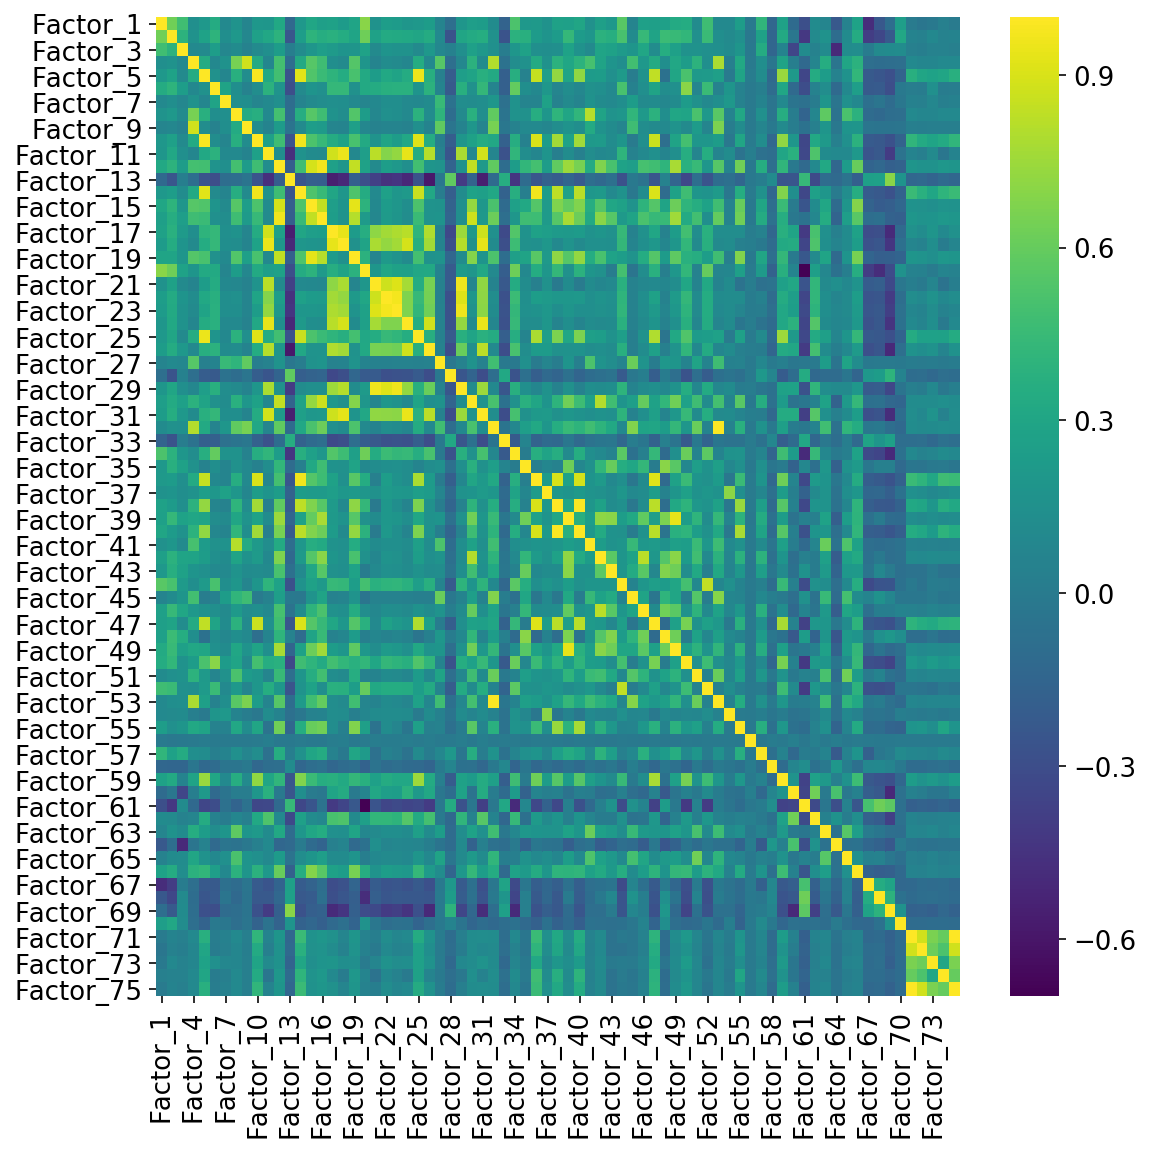

In [76]:
features = data.drop(['STATUS', 'Балл'], axis=1) 
target = data['STATUS']

sns.heatmap(features.corr(), cmap='viridis')

We see from the figure that there certain features which obviously are correlated (not independent). Surely we should drop them from the consideration to design the most accurate model. I will do it not manually but using Lasso regression (L1) which posses this wonderful feature

## Data preprocessing

Before to train the model we need to handle the problem of different orders of magnitude between different features --> perform features scaling

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}, \quad \mu_d = \frac{1}{N} \sum_{i=1}^l x_{id}, \quad \sigma_d = \sqrt{\frac{1}{N-1} \sum_{i=1}^l (x_{id} - \mu_d)^2} $$

In [77]:
features = ( features - features.mean() ) / features.std()

features.head()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_66,Factor_67,Factor_68,Factor_69,Factor_70,Factor_71,Factor_72,Factor_73,Factor_74,Factor_75
0,-1.015716,-1.577191,-0.417557,-0.125893,-0.603318,-0.734210,-0.243848,-0.124043,0.048036,-0.583498,...,-0.57137,1.265612,0.278075,0.844681,-0.424019,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
1,0.332544,-0.516499,0.698407,0.067949,-0.161564,-0.199359,0.144567,0.064587,-0.143876,-0.040191,...,-0.57137,-0.269302,-0.596394,-0.480695,-0.409408,-0.347575,-0.335842,0.150101,1.715970,-0.347575
2,-2.156549,-1.629418,-3.001903,-0.287824,-0.382441,-0.734210,-0.243848,-0.343948,-0.177527,-0.402396,...,-0.57137,-0.511660,-0.638035,-0.526263,-0.448035,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
3,1.265953,1.961314,0.874614,-0.246828,0.059313,0.911487,0.109068,-0.271119,-0.133088,-0.040191,...,1.10910,-0.511660,-0.638035,-0.481997,-0.448035,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
4,1.265953,-0.886506,-0.417557,-0.284668,-0.382441,-0.117074,-0.203095,-0.332519,-0.173131,-0.402396,...,-0.57137,-0.511660,-0.027295,-0.526263,0.463005,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575


As it s done let us perform train-test split of the dataset to train the model and evaluate it s quality

In [78]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            stratify=target
                                                                            )

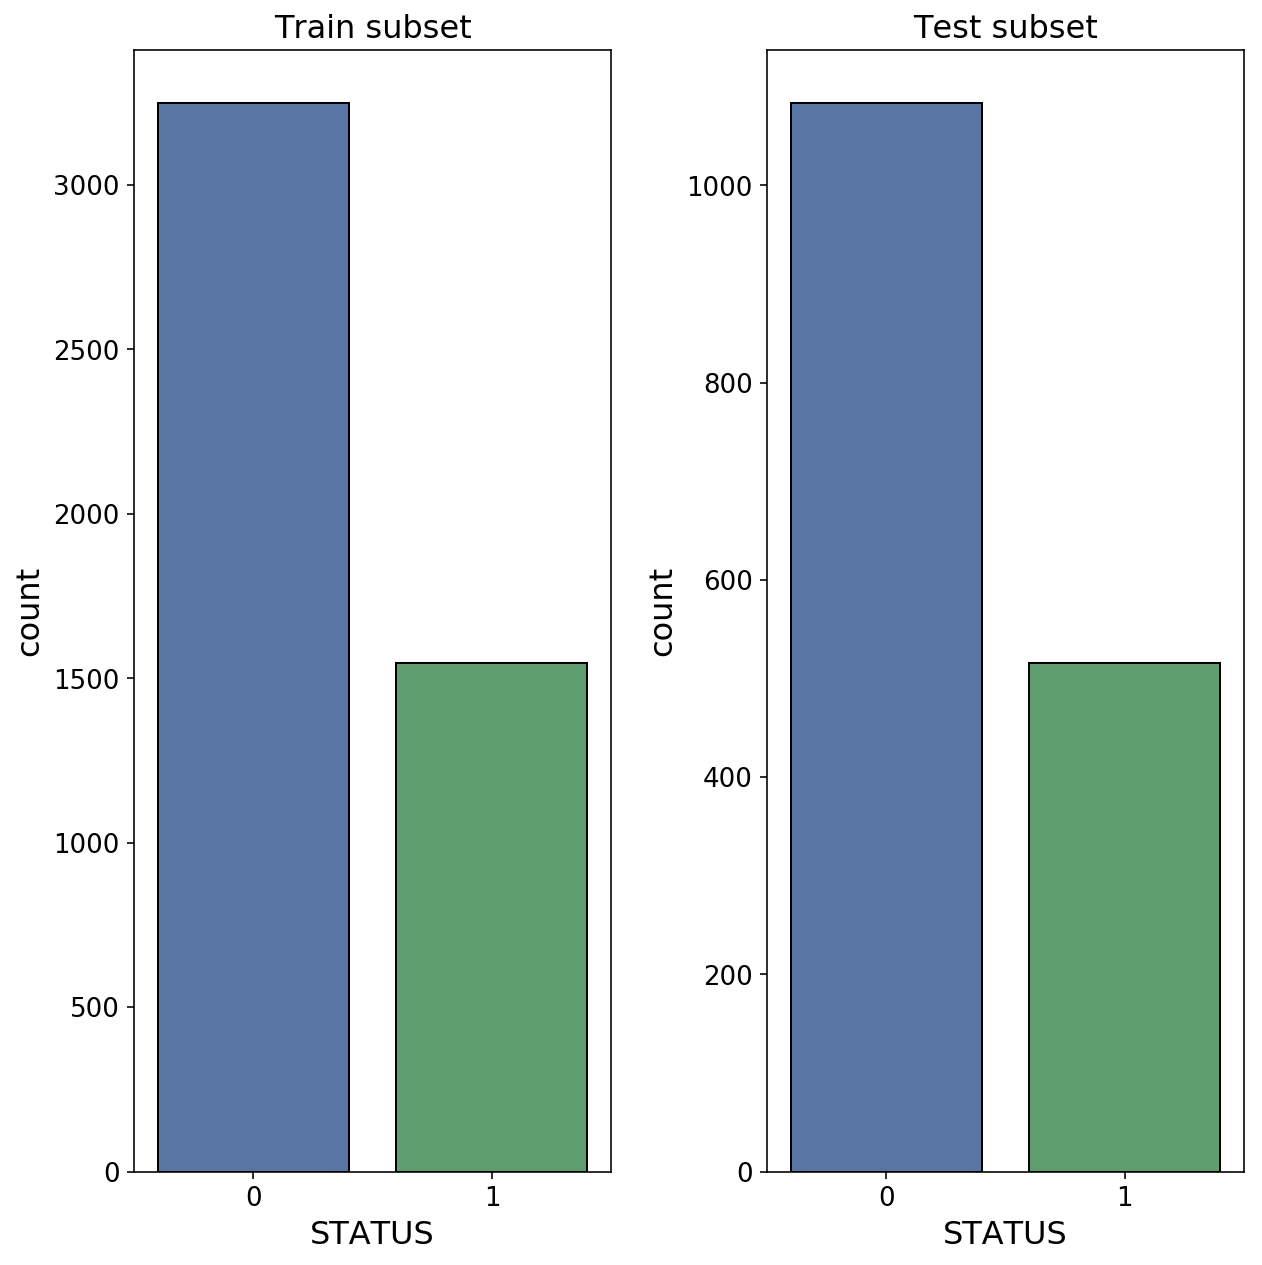

In [79]:
plt.subplot(121)
plt.title('Train subset')
sns.countplot(target_train)
plt.subplot(122)
plt.title('Test subset')
sns.countplot(target_test)

plt.tight_layout()

So the stratification works -- we get identical distributions for both train and test subsets 

Now all we have to do is to select an appropriate model and train it on our based including, of course, correction for the classes to be non-balanced (I mentioned it at previous subsection)

In [80]:
def plot_roc_curve(references, predictions, model_title=''):
    """
    Plot receiver operating characteristic (ROC) curve for the given train and test
    subsets
    
    :param references: [*, *] list of reference data splitted to train and test subsets
    :param predictions: [*, *] list of predicted targets identical to ${references} splitting
    :param model_title: title of using model to display on plot
    
    :return: in-place plot the ROC curves for train and test subsets
    """
    plt.title(f'ROC curves for train and test subsets ({model_title} model)', fontsize=18)
    # 
    train_data, test_data = references
    train_predictions, test_predictions = predictions
    #
    # ROC for train subset
    tpr, fpr, _ = roc_curve(train_data, train_predictions)
    plt.plot(tpr, fpr, lw=4, label=f'[{model_title}] AUC train: {round(roc_auc_score(train_data, train_predictions), 4)}')
    
    # ROC for test subset
    tpr, fpr, _ = roc_curve(test_data, test_predictions)
    plt.plot(tpr, fpr, lw=4, label=f'[{model_title}] AUC test: {round(roc_auc_score(test_data, test_predictions), 4)}')
    
    # Random guess model
    plt.plot([0., 1.], [0., 1.], lw=4, label='Random guessing')
    
    # Axis settings
    plt.xlabel('False positive rate', fontsize=16)
    plt.xlim(0., 1.)
    
    plt.ylabel('True positive rate', fontsize=16)
    plt.ylim(0., 1.)
    plt.legend(fontsize = 16, loc='lower right')
    #

## Logistic regression


$\underline{Nota \text{ } bene}$: It is important to set class_weights kward to 'balanced' while LogisticRegression object initializing in order to account misbalance of "0" and "1" classes (see the first subsection for more details). 


$$ Q(X, y, \theta) = \sum_{d=1}^D |w_d| + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

$\bf{L1-penalty}$ (Lasso) is used to filter correlated features

In [81]:
logistic_regressor = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [82]:
logistic_regressor.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [83]:
params_grid = {'C': [1.0e-2, 1.0e-1, 1.0, 10, 100, 1000]}

lr_estimator = GridSearchCV(logistic_regressor, params_grid, cv=5)
lr_estimator.fit(features_train, target_train)
lr_estimator.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [84]:
target_predicted = lr_estimator.predict_proba(features_test)[:, 1]
from sklearn.metrics import roc_auc_score


roc_auc_score(target_test, target_predicted)

0.718031308381112

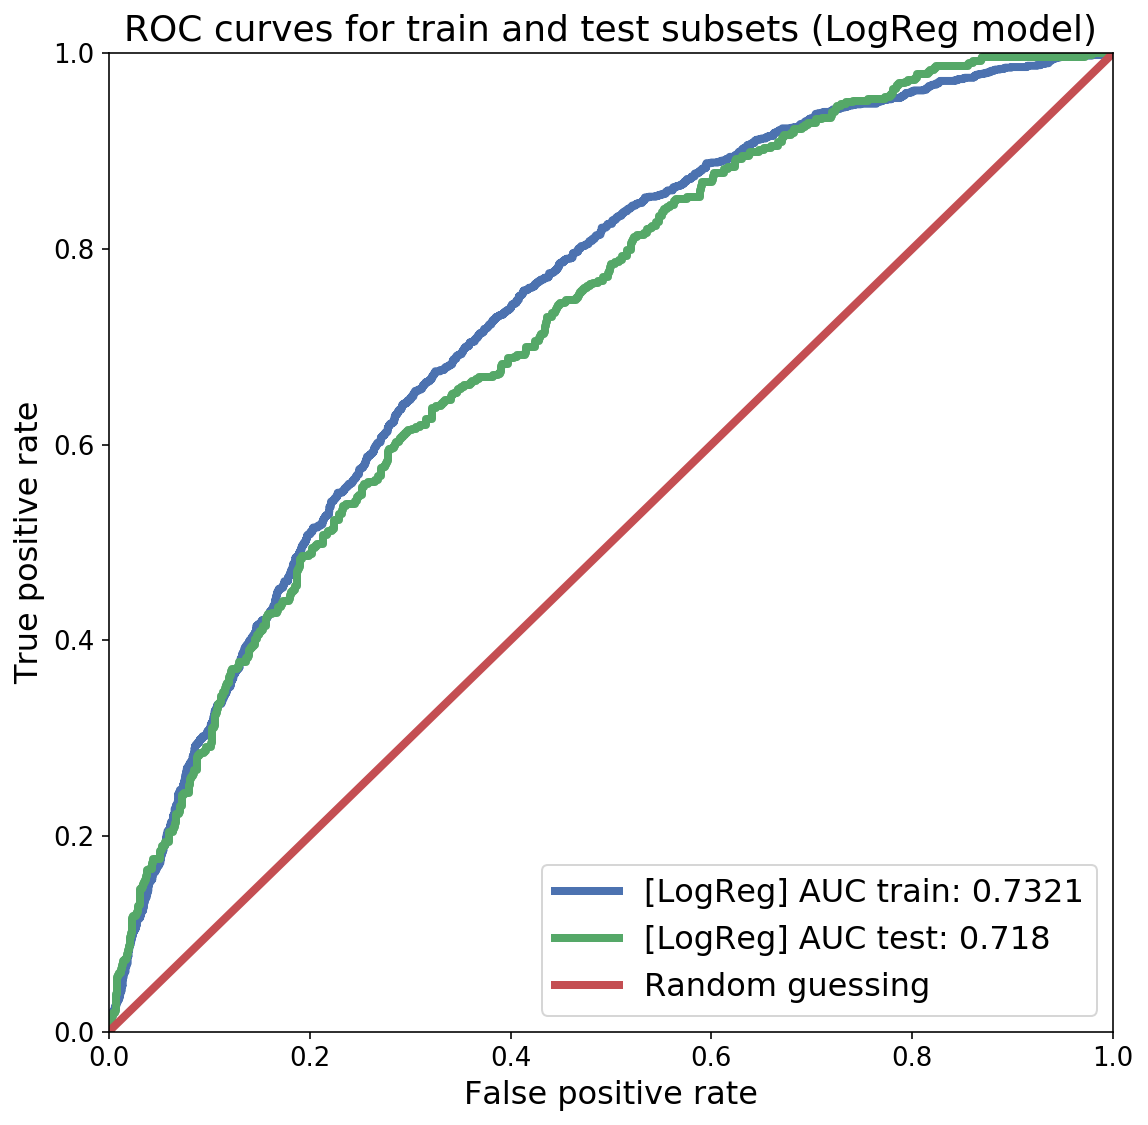

In [85]:
predictions = [lr_estimator.predict_proba(samples)[:, 1] for samples in (features_train, features_test)]
plot_roc_curve([target_train, target_test], predictions, 'LogReg')

The result is not ideal but can be a good inital point

In [86]:
tmp = lr_estimator.predict_proba(features)[:, 1]

roc_auc_score(target, tmp)

0.728402862363824

## Random Forest

Now let us turn to more sophisticated model which is Random Forest (https://en.wikipedia.org/wiki/Random_forest)

In [87]:
rf_classifier = RandomForestClassifier(n_estimators=150, class_weight='balanced')

rf_classifier.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [88]:
params_grid = {
    'max_depth': range(25, 41),
    'min_samples_leaf': range(5, 16),
    'criterion': ['gini', 'entropy']
}

rf_estimator = GridSearchCV(rf_classifier, params_grid, cv=5, n_jobs=-1)
rf_estimator.fit(features_train, target_train)

print(rf_estimator.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=38, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [89]:
target_predicted = rf_estimator.predict_proba(features_test)[:, 1]

print(f'ROC AUC for Random Forest model: {roc_auc_score(target_test, target_predicted)}')

ROC AUC for Random Forest model: 0.7089676966794792


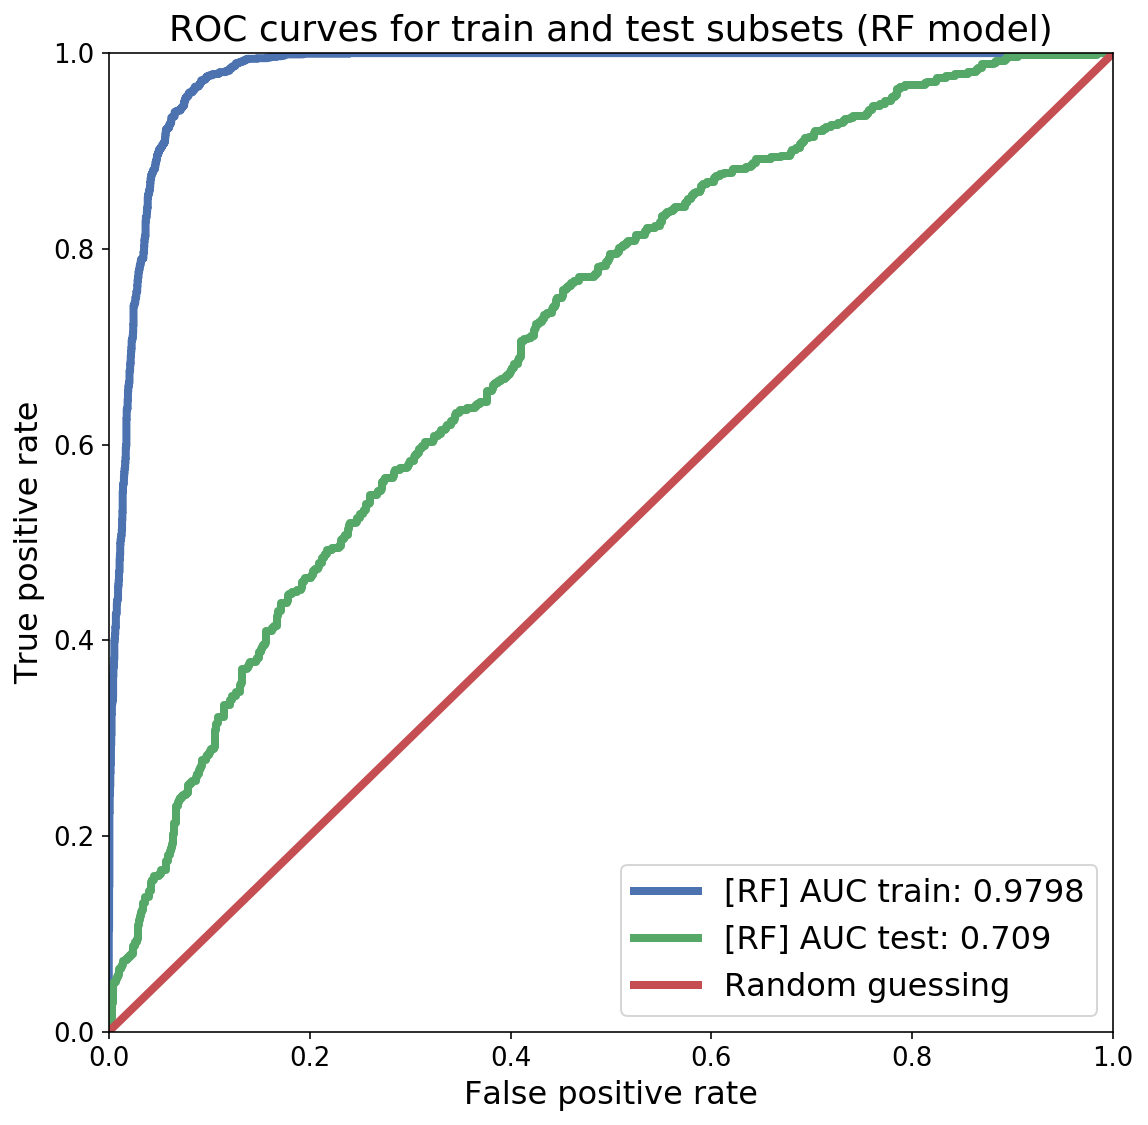

In [90]:
predictions = [rf_estimator.predict_proba(samples)[:, 1] for samples in (features_train, features_test)]
plot_roc_curve([target_train, target_test], predictions, 'RF')

We see from the plot that classifier is very accurate on train subset (quite natural for Random Forest) and show a little bit better result on test subset comparing with Logistic Regression model. Overall, let us evalutae ROC AUC on the entire dataset and obtain the final comparison between models 

ROC AUC score for Logistic Regression: 0.728402862363824
ROC AUC score for Random Forest: 0.9269403201149475


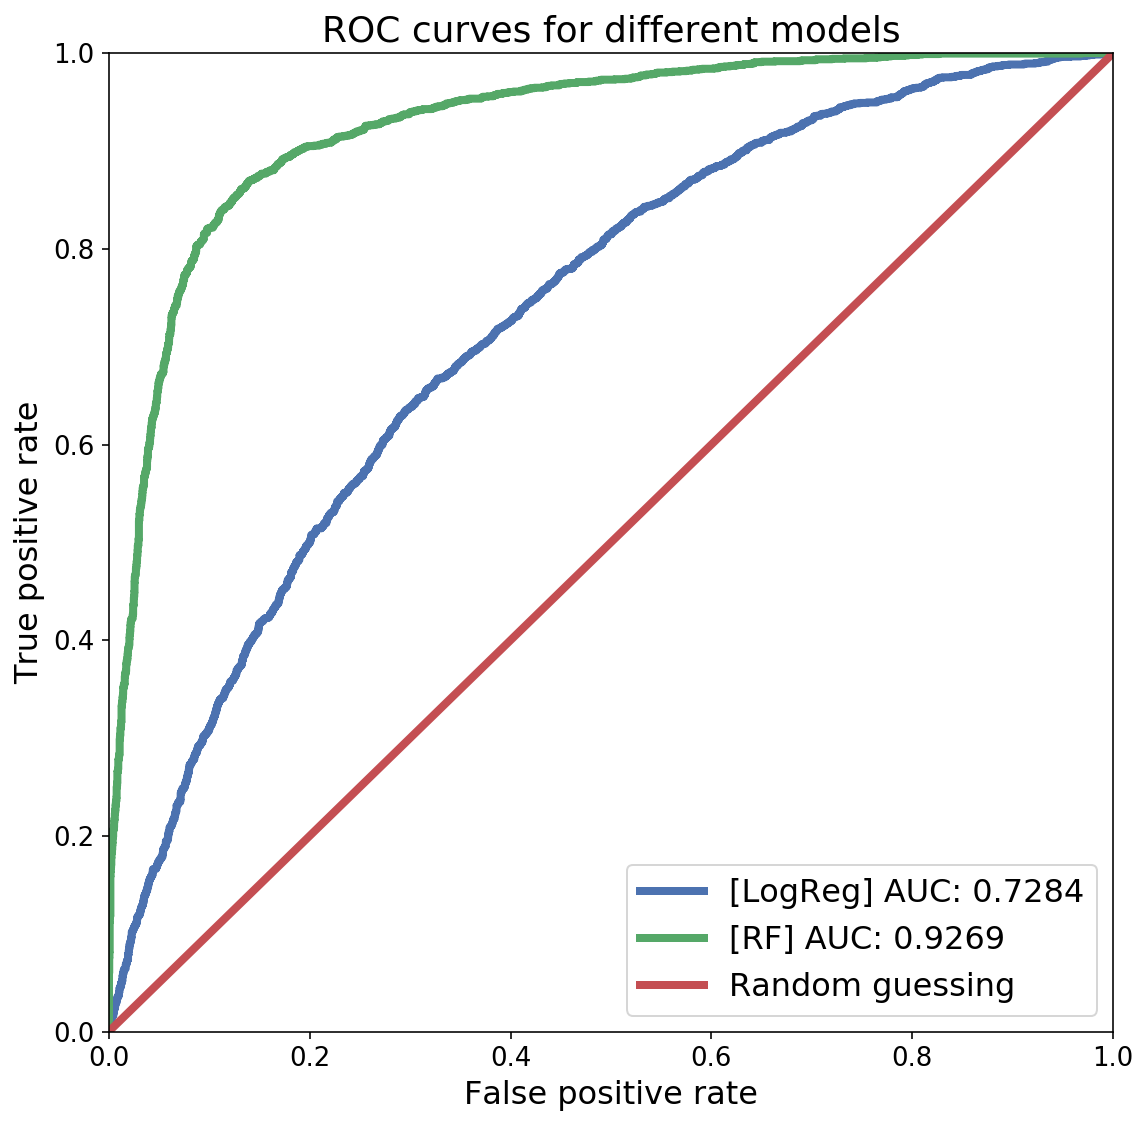

In [91]:
predictions_lr = lr_estimator.predict_proba(features)[:, 1]
predictions_rf = rf_estimator.predict_proba(features)[:, 1]


print(f'ROC AUC score for Logistic Regression: {roc_auc_score(target, predictions_lr)}')
print(f'ROC AUC score for Random Forest: {roc_auc_score(target, predictions_rf)}')

plot_roc_curve([target, target], [predictions_lr, predictions_rf])

plt.title('ROC curves for different models', fontsize=18)
plt.legend([f'[LogReg] AUC: {round(roc_auc_score(target, predictions_lr), 4)}', 
            f'[RF] AUC: {round(roc_auc_score(target, predictions_rf), 4)}',
            f'Random guessing'], fontsize=16)

## Data postprocessing


Now there is a certain need to determine which features store no useful information for target value ('status') prediction. To achive this, we use a property of Lasso regression to filter non-informative features.

In [220]:
lr_model_coeffs = lr_estimator.best_estimator_.coef_

zero_features = np.where(features_importances == 0)[1]

print('Non useful features: \n')
for idx in zero_features:
    print(f'Factor_{idx} -- non useful')

Non useful features: 

Factor_3 -- non useful
Factor_4 -- non useful
Factor_6 -- non useful
Factor_8 -- non useful
Factor_10 -- non useful
Factor_11 -- non useful
Factor_12 -- non useful
Factor_13 -- non useful
Factor_14 -- non useful
Factor_20 -- non useful
Factor_22 -- non useful
Factor_23 -- non useful
Factor_25 -- non useful
Factor_28 -- non useful
Factor_29 -- non useful
Factor_30 -- non useful
Factor_31 -- non useful
Factor_37 -- non useful
Factor_39 -- non useful
Factor_40 -- non useful
Factor_41 -- non useful
Factor_46 -- non useful
Factor_48 -- non useful
Factor_49 -- non useful
Factor_50 -- non useful
Factor_51 -- non useful
Factor_52 -- non useful
Factor_55 -- non useful
Factor_61 -- non useful
Factor_69 -- non useful
Factor_70 -- non useful
Factor_74 -- non useful


As the Random Forest showed itself a good classifation technique, we now will switch to it and use to calculate additional target value -- points which is a quantative charachteristic for the object belong to class '1' (the lower points is the greater the probability of it)

Text(0.5, 0, 'Points')

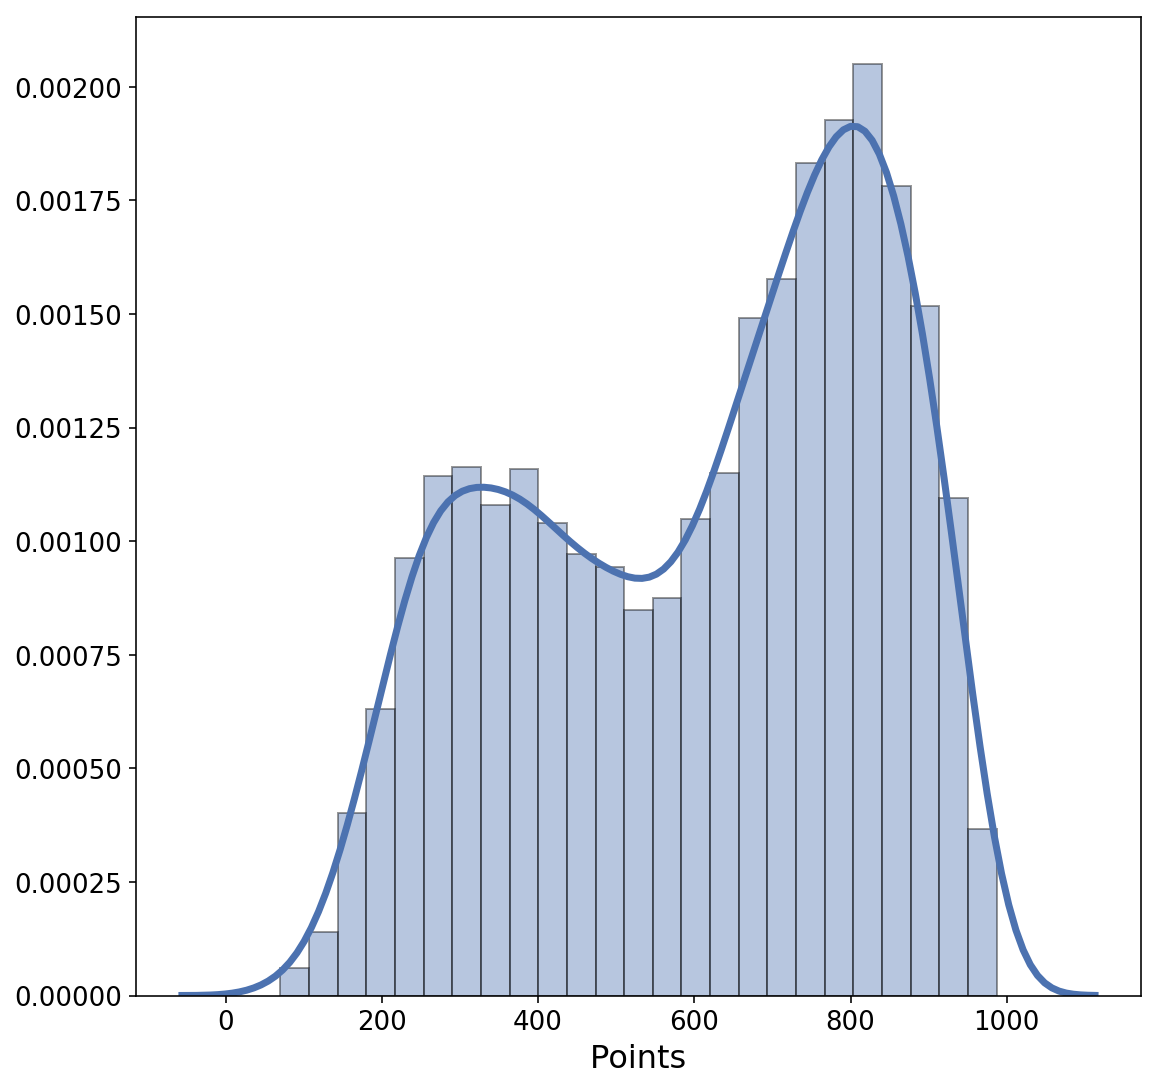

In [226]:
points = (rf_estimator.predict_proba(features)[:, 0] * 1000).astype(np.int)

sns.distplot(points, bins=25, kde_kws={'lw': 3.5}, norm_hist=True)
plt.xlabel('Points', fontsize=16)

In [260]:
def get_all_border_points():
    """
    Returns tuple of all border points to be used in intervals construction
    """
    return (0, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 1000)

def get_all_intervals():
    """
    Return list of all desirable intervals from 0 to 1000
    Note that distribution is not uniform and designed specifically to that particular task
    """
    interval_borders = get_all_border_points()
    return [(l_border, r_border) for l_border, r_border in zip(interval_borders, interval_borders[1:])]

def get_interval(point):
    """
    Match the given point value with corresponding interval to lie in
    
    :param point: value of scorring point
    :return list containing left and right borders corresponding to point value
    """
    for l_border, r_border in get_all_intervals():
        if point >= l_border and point < r_border:
            return (l_border, r_border)
        
intervals = tuple(map(get_interval, points))

As the points <--> interval binding is created, let us split the samples by intervals and form the desired new table

In [261]:
# split samples by intervals
indecies_for_intervals = [] # list storing indicies list for each of intervals
counts = [] # count of samples belong to each interval
#

for interval in get_all_intervals():
    tmp = [idx for idx, value in enumerate(intervals) if value == interval]
    indecies_for_intervals.append(tmp)
    counts.append( len(tmp) )

# Check that all the samples are fetched
if not sum(counts) == target.shape[0]:
    raise AssertionError('Not all the objects are fetched')
    
print(f'All the samples are fetched')

All the samples are fetched


The splitting seems to finish without errors so we finally move to the creation of the desired table

In [274]:
intervals_str = [f'[{l_border}; {r_border})' for l_border, r_border in zip(get_all_border_points(), get_all_border_points()[1:])]

tmp = {'Interval': intervals_str}
desired_table = pd.DataFrame(tmp)

desired_table

,Interval
0,[0; 250)
1,[250; 300)
2,[300; 350)
3,[350; 400)
4,[400; 450)
5,[450; 500)
6,[500; 550)
7,[550; 600)
8,[600; 650)
9,[650; 700)


## Polynomial transform of the features

Linear models (and logistic regression is one of them) cant fetch nonlinear feature-target dependences. But we can use some trick in order to partially solve this problem. The solution is -- introduce new features.

in this case it will be polynomial (degree = 2) combinations of the existing ones

In [56]:
from sklearn.preprocessing import PolynomialFeatures

transform = PolynomialFeatures(2)
features_train_polynomial = transform.fit_transform(features_train)
features_test_polynomial = transform.transform(features_test)

In [57]:
print(f'Training set shape before: {features_train.shape}')
print(f'Training set shape after: {features_train_polynomial.shape}')

Training set shape before: (4795, 75)
Training set shape after: (4795, 2926)


Once its done, lets train the model on the new features set

In [63]:
#params_grid = {'C': [1.0e-2, 1.0e-1, 1.0, 10]}
#logistic_regressor = LogisticRegression(class_weight='balanced', fit_intercept=False, penalty='l1', 
#                                        solver='liblinear')

#poly_lr_estimator = RandomizedSearchCV(logistic_regressor, params_grid, n_jobs=3, cv=3, n_iter=10)
#poly_lr_estimator.fit(features_train_polynomial, target_train)
#poly_lr_estimator.best_estimator_